In [43]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('ggplot')
import joblib
import glob

import SNclass
reload(SNclass);

In [24]:
N = 300
for n,f in enumerate(sorted(glob.glob('SIMGEN_PUBLIC_DES/DES_*.DAT.gz'))[:N]):
    obs, metadata = SNclass.SNPhotCC_Parser(f)
    #print n, snid, sn_type, sim_type, sim_z, obs.shape
    if n == 130:  # stop at a nice big lightcurve
    #if n == 0:
        break

print f
obs.head()

SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz


,MJD,FLT,FLUXCAL,FLUXCALERR,SNR,MAG,MAGERR,SIM_MAG
0,56207.156,g,1.262,2.280,0.55,99.0,5.0,99.0
1,56207.172,r,1.830,1.603,1.14,99.0,5.0,99.0
2,56209.191,i,1.739,2.140,0.81,99.0,5.0,99.0
3,56209.215,z,1.936,2.200,0.88,99.0,5.0,99.0
4,56215.164,g,-1.567,1.595,-0.98,99.0,5.0,99.0


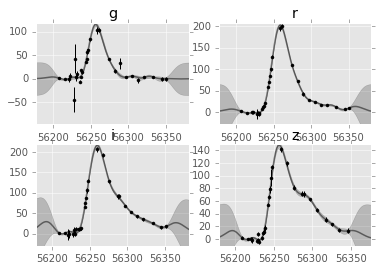

In [78]:
reload(SNclass)
obs, metadata, gps = SNclass.SNPhot_fitter('SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz')
SNclass.SNPhot_plotter(obs, gps)

In [15]:
reload(SNclass)
%timeit SNclass.SNPhotCC_Parser('SIMGEN_PUBLIC_DES/DES_SN005754.DAT.gz')

100 loops, best of 3: 3.53 ms per loop


In [70]:
reload(SNclass)
%timeit SNclass.SNPhot_fitter(obs)

10 loops, best of 3: 66.2 ms per loop


In [14]:
import cPickle
tmp = cPickle.dumps((obs, metadata, gps))  # approximate size of objects
len(tmp) * 30000 / 1024 / 1024   # what if we were to read them all in and fit them all? (in megabytes)

3664

Note I had to update the code to get it to not fail on any of the first 300 lightcurves: changed
```
kernel = np.var(y) * kernels.ExpSquaredKernel(100.)
```
to
```
kernel = 5. * np.var(y) * kernels.ExpSquaredKernel(100.)
```

In [87]:
reload(SNclass)
N = 3000
lcdata = [SNclass.SNPhot_fitter(f) for f in sorted(glob.glob('SIMGEN_PUBLIC_DES/DES_*.DAT.gz'))[:N]]

ERROR(1): SIMGEN_PUBLIC_DES/DES_SN046478.DAT.gz i -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN052483.DAT.gz r -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz r -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz z -- trying again
ERROR(2): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz z -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN080527.DAT.gz r -- trying again
ERROR(2): SIMGEN_PUBLIC_DES/DES_SN080527.DAT.gz r -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN080527.DAT.gz z -- trying again


In [88]:
tmp = cPickle.dumps(lcdata)  # approximate size of objects
len(tmp) * 30000 / 1024 / 1024

9208392

ERROR(1): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz r -- trying again
ERROR(1): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz z -- trying again
ERROR(2): SIMGEN_PUBLIC_DES/DES_SN076533.DAT.gz z -- trying again


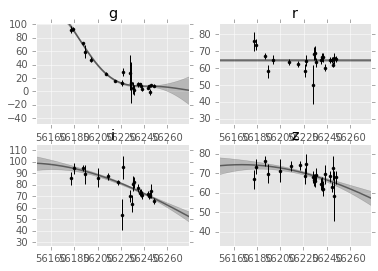

In [86]:
reload(SNclass)
f = 'SIMGEN_PUBLIC_DES/DES_SN080.DAT.gz'
obs, metadata, gps = SNclass.SNPhot_fitter(f)
SNclass.SNPhot_plotter(obs, gps)